# **SEATTLE CRIME ON THE DIME**
Adamou Tidjani, Gina Philipose, and Trinh Tran

*The project is about forecasting the location and number of crimes that occur in the neighborhoods of Seattle. We are using data from the Seattle Police Department (SPD) which contains 1.49 million rows and 19 columns. We have identified 13 columns of interest that will help us achieve our goal. Our objective is to create a model that we can hand off to the city to help them predict where a crime would have more likely occurred given the time and type of crime. For example, let’s say someone is a victim of a crime at a certain time and might not know where they are located, the police officers can use our model to best predict where they should intervene and possibly save that person’s life.*

Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

Getting the Data (already pre-processed):

In [2]:
url = "https://huggingface.co/datasets/tnltrinh/seattle_crime/resolve/main/dataset/crime_data_2.parquet"
crime_data = pd.read_parquet(url, engine="pyarrow")
crime_data.head()

,Report Number,Report DateTime,Offense ID,Offense Date,Duration,NIBRS Group AB,NIBRS Crime Against Category,Offense Sub Category,Shooting Type Group,Block Address,...,Report_Year,Report_Month,Report_Day,Offense_Year,Offense_Month,Offense_Day,Report_Hour,Offense_Hour,Report_DayOfWeek,Offense_DayOfWeek
0,2010-902213,2010-12-02 16:17:00,7700230809,2010-12-02 14:00:00,0 days 02:17:00,A,PROPERTY,LARCENY-THEFT,<NA>,72XX BLOCK OF WOODLAWN AVE NE,...,2010,12,2,2010,12,2,16,14,Thursday,Thursday
1,2011-296913,2011-09-08 17:22:00,7626066385,2011-09-08 00:00:00,0 days 17:22:00,B,ANY,ALL OTHER,<NA>,26TH AVE NE / NE 127TH ST,...,2011,9,8,2011,9,8,17,0,Thursday,Thursday
2,2015-294854,2015-08-23 20:29:00,7690271814,2015-08-23 13:30:00,0 days 06:59:00,A,PROPERTY,BURGLARY,<NA>,9XX BLOCK OF N 72ND ST,...,2015,8,23,2015,8,23,20,13,Sunday,Sunday
3,2014-132453,2014-04-30 13:57:00,7687185106,2014-04-30 13:10:00,0 days 00:47:00,A,PROPERTY,LARCENY-THEFT,<NA>,14XX BLOCK OF BROADWAY,...,2014,4,30,2014,4,30,13,13,Wednesday,Wednesday
4,2019-454354,2019-12-08 15:17:05,12034644268,2019-12-07 20:00:00,0 days 19:17:05,A,PROPERTY,MOTOR VEHICLE THEFT,<NA>,29XX BLOCK OF 19TH AVE S,...,2019,12,8,2019,12,7,15,20,Sunday,Saturday


In [3]:
crime_data_1 = crime_data.replace({np.nan: "None"})

In [4]:
crime_data_1.dtypes

,0
Report Number,string[python]
Report DateTime,datetime64[ns]
Offense ID,Int64
Offense Date,datetime64[ns]
Duration,timedelta64[ns]
NIBRS Group AB,string[python]
NIBRS Crime Against Category,string[python]
Offense Sub Category,string[python]
Shooting Type Group,string[python]
Block Address,string[python]


Setting to type str to use CategoricalNB:

In [5]:
crime_data_2 = crime_data_1.astype(str)

# Trying CategoricalNB with 'Offense_Hour' Time Column and 'Precinct' Target Column

Separating predictors and labels

In [135]:
crime_data_X = crime_data_2[['Offense_Hour', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_2[['Precinct']]

Splitting training and test data

In [136]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [137]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Training

In [138]:
model = CategoricalNB()
model.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

Predicting

In [139]:
y_pred = model.predict(X_test_enc)

In [140]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.32670032253540876


In [141]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        East       0.26      0.00      0.00     46208
        None       0.00      0.00      0.00      1877
       North       0.34      0.70      0.46     88678
         OOJ       0.05      0.06      0.05       891
       South       0.39      0.00      0.01     42218
   Southwest       0.00      0.00      0.00     28092
        West       0.30      0.39      0.34     77276

    accuracy                           0.33    285240
   macro avg       0.19      0.17      0.12    285240
weighted avg       0.29      0.33      0.24    285240



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Trying CategoricalNB with 'Offense_Day' Time Column and 'Precinct' Target Column

Separating predictors and labels

In [6]:
crime_data_X = crime_data_2[['Offense_Day', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_2[['Precinct']]

Splitting training and test data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [8]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Training

In [9]:
model = CategoricalNB()
model.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

Predicting

In [10]:
y_pred = model.predict(X_test_enc)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.32845673818538773


In [12]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        East       0.00      0.00      0.00     45860
        None       0.00      0.00      0.00      1855
       North       0.34      0.71      0.46     88528
         OOJ       0.00      0.00      0.00       928
       South       0.36      0.00      0.01     42033
   Southwest       0.00      0.00      0.00     28713
        West       0.31      0.40      0.35     77323

    accuracy                           0.33    285240
   macro avg       0.14      0.16      0.12    285240
weighted avg       0.24      0.33      0.24    285240



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Trying CategoricalNB with 'Offense_Month' Time Column and 'Precinct' Target Column

Separating predictors and labels

In [13]:
crime_data_X = crime_data_2[['Offense_Month', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_2[['Precinct']]

Splitting training and test data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [15]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Training

In [16]:
model = CategoricalNB()
model.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

Predicting

In [17]:
y_pred = model.predict(X_test_enc)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3274856261393914


In [19]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        East       0.00      0.00      0.00     45741
        None       0.00      0.00      0.00      1870
       North       0.34      0.70      0.46     88980
         OOJ       0.00      0.00      0.00       891
       South       0.38      0.00      0.01     42318
   Southwest       0.00      0.00      0.00     28636
        West       0.30      0.40      0.34     76804

    accuracy                           0.33    285240
   macro avg       0.15      0.16      0.12    285240
weighted avg       0.24      0.33      0.24    285240



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Trying CategoricalNB with 'Offense_Year' Time Column and 'Precinct' Target Column

Separating predictors and labels

In [20]:
crime_data_X = crime_data_2[['Offense_Year', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_2[['Precinct']]

Splitting training and test data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [22]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Training

In [23]:
model = CategoricalNB()
model.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

Predicting

In [24]:
y_pred = model.predict(X_test_enc)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.32479315664002245


In [26]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        East       0.00      0.00      0.00     45970
        None       0.00      0.00      0.00      1907
       North       0.34      0.70      0.46     89381
         OOJ       0.03      0.16      0.05       871
       South       0.31      0.01      0.01     41920
   Southwest       0.00      0.00      0.00     28402
        West       0.30      0.39      0.34     76789

    accuracy                           0.32    285240
   macro avg       0.14      0.18      0.12    285240
weighted avg       0.23      0.32      0.24    285240



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Trying CategoricalNB with 'Offense_Day', 'Offense_Month', and 'Offense_Year' Time Columns and 'Precinct' Target Column

Separating predictors and labels

In [27]:
crime_data_X = crime_data_2[['Offense_Month', 'Offense_Day', "Offense_Year", 'NIBRS Crime Against Category', 'Offense Sub Category']] # features in the test set
crime_data_y = crime_data_2[['Precinct']]

Splitting training and test data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [29]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Training

In [30]:
model = CategoricalNB()
model.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

Predicting

In [31]:
y_pred = model.predict(X_test_enc)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.32491586032814473


In [33]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        East       0.22      0.00      0.00     45864
        None       0.00      0.00      0.00      1894
       North       0.34      0.70      0.46     89061
         OOJ       0.03      0.13      0.05       904
       South       0.32      0.01      0.01     42366
   Southwest       0.00      0.00      0.00     28475
        West       0.30      0.39      0.34     76676

    accuracy                           0.32    285240
   macro avg       0.17      0.18      0.12    285240
weighted avg       0.27      0.32      0.24    285240



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Trying CategoricalNB with 'Offense_Hour', 'Offense_Month', 'Offense_Year' Time Columns and 'Precinct' Target Column

Separating predictors and labels

In [142]:
crime_data_X = crime_data_2[['Offense_Hour', 'Offense_Month', 'Offense_Year', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_2[['Precinct']]

Splitting training and test data

In [143]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [144]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Training

In [145]:
model = CategoricalNB()
model.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

Predicting

In [146]:
y_pred = model.predict(X_test_enc)

In [147]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3240148646753611


In [148]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        East       0.22      0.01      0.01     45781
        None       0.00      0.00      0.00      1882
       North       0.34      0.70      0.46     89332
         OOJ       0.03      0.15      0.05       888
       South       0.29      0.01      0.01     42153
   Southwest       0.00      0.00      0.00     28373
        West       0.30      0.38      0.34     76831

    accuracy                           0.32    285240
   macro avg       0.17      0.18      0.13    285240
weighted avg       0.27      0.32      0.24    285240



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Trying CategoricalNB with 'Offense_Day' Time Column and 'Neighborhood' Target Column

Separating predictors and labels

In [34]:
crime_data_X = crime_data_2[['Offense_Day', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_2[['Neighborhood']]

Splitting training and test data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [36]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Training

In [37]:
model = CategoricalNB()
model.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

Predicting

In [38]:
y_pred = model.predict(X_test_enc)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2006030009816295


In [40]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                  precision    recall  f1-score   support

                 ALASKA JUNCTION       0.00      0.00      0.00      3168
                            ALKI       0.00      0.00      0.00      1101
                   BALLARD NORTH       0.00      0.00      0.00      3686
                   BALLARD SOUTH       0.00      0.00      0.00      7435
                        BELLTOWN       0.00      0.00      0.00      7082
                     BITTER LAKE       0.00      0.00      0.00         1
                      BITTERLAKE       0.00      0.00      0.00      3985
                 BRIGHTON/DUNLAP       0.00      0.00      0.00      2894
                       BROADVIEW       0.00      0.00      0.00         2
                    CAPITOL HILL       0.00      0.00      0.00     15796
        CENTRAL AREA/SQUIRE PARK       0.00      0.00      0.00      5829
CHINATOWN/INTERNATIONAL DISTRICT       0.00      0.00      0.00      6751
         CLAREMONT/RAINIER VISTA     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Trying CategoricalNB with 'Offense_Month' Time Column and 'Neighborhood' Target Column

Separating predictors and labels

In [41]:
crime_data_X = crime_data_2[['Offense_Month', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_2[['Neighborhood']]

Splitting training and test data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [43]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Training

In [44]:
model = CategoricalNB()
model.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

Predicting

In [45]:
y_pred = model.predict(X_test_enc)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.1992532604122844


In [47]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                  precision    recall  f1-score   support

                 ALASKA JUNCTION       0.00      0.00      0.00      3259
                            ALKI       0.00      0.00      0.00      1148
                   ARBOR HEIGHTS       0.00      0.00      0.00         1
                   BALLARD NORTH       0.00      0.00      0.00      3734
                   BALLARD SOUTH       0.00      0.00      0.00      7607
                        BELLTOWN       0.00      0.00      0.00      7040
                     BITTER LAKE       0.00      0.00      0.00         1
                      BITTERLAKE       0.00      0.00      0.00      4001
                 BRIGHTON/DUNLAP       0.00      0.00      0.00      2919
                       BROADVIEW       0.00      0.00      0.00         3
                    CAPITOL HILL       0.00      0.00      0.00     15948
        CENTRAL AREA/SQUIRE PARK       0.00      0.00      0.00      5752
CHINATOWN/INTERNATIONAL DISTRICT     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Trying CategoricalNB with 'Offense_Year' Time Column and 'Neighborhood' Target Column

Separating predictors and labels

In [48]:
crime_data_X = crime_data_2[['Offense_Year', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_2[['Neighborhood']]

Splitting training and test data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [50]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Training

In [51]:
model = CategoricalNB()
model.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

Predicting

In [52]:
y_pred = model.predict(X_test_enc)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.23003435703267425


In [54]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                  precision    recall  f1-score   support

                 ALASKA JUNCTION       0.00      0.00      0.00      3215
                            ALKI       0.00      0.00      0.00      1043
                   BALLARD NORTH       0.00      0.00      0.00      3720
                   BALLARD SOUTH       0.00      0.00      0.00      7638
                        BELLTOWN       0.00      0.00      0.00      7028
                      BITTERLAKE       0.00      0.00      0.00      3951
                 BRIGHTON/DUNLAP       0.02      0.00      0.00      3033
                       BROADVIEW       0.00      0.00      0.00         1
                    CAPITOL HILL       0.08      0.10      0.09     15794
        CENTRAL AREA/SQUIRE PARK       0.00      0.00      0.00      5724
CHINATOWN/INTERNATIONAL DISTRICT       0.05      0.06      0.06      6597
         CLAREMONT/RAINIER VISTA       0.00      0.00      0.00      1466
                   COLUMBIA CITY     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Trying CategoricalNB with 'Offense_Day', 'Offense_Month', and 'Offense_Year' Time Columns and 'Neighborhood' Target Column

Separating predictors and labels

In [55]:
crime_data_X = crime_data_2[['Offense_Month', 'Offense_Day', "Offense_Year", 'NIBRS Crime Against Category', 'Offense Sub Category']] # features in the test set
crime_data_y = crime_data_2[['Neighborhood']]

Splitting training and test data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [57]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Training

In [58]:
model = CategoricalNB()
model.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

Predicting

In [59]:
y_pred = model.predict(X_test_enc)

In [60]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.22986257186930303


In [61]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                  precision    recall  f1-score   support

                 ALASKA JUNCTION       0.00      0.00      0.00      3218
                            ALKI       0.00      0.00      0.00      1118
                   ARBOR HEIGHTS       0.00      0.00      0.00         2
                   BALLARD NORTH       0.00      0.00      0.00      3717
                   BALLARD SOUTH       0.00      0.00      0.00      7584
                        BELLTOWN       0.00      0.00      0.00      6998
                      BITTERLAKE       0.00      0.00      0.00      3989
                 BRIGHTON/DUNLAP       0.03      0.00      0.00      2997
                       BROADVIEW       0.00      0.00      0.00         2
                    CAPITOL HILL       0.08      0.10      0.09     15763
        CENTRAL AREA/SQUIRE PARK       0.00      0.00      0.00      5678
CHINATOWN/INTERNATIONAL DISTRICT       0.05      0.06      0.06      6657
         CLAREMONT/RAINIER VISTA     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Trying CategoricalNB with 'Offense_Hour', 'Offense_Month', 'Offense_Year' Time Columns and 'Neighborhood' Target Column

Separating predictors and labels

In [149]:
crime_data_X = crime_data_2[['Offense_Hour', 'Offense_Month', 'Offense_Year', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_2[['Neighborhood']]

Splitting training and test data

In [150]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [151]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Training

In [152]:
model = CategoricalNB()
model.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

Predicting

In [153]:
y_pred = model.predict(X_test_enc)

In [154]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.23083718973496004


In [155]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                  precision    recall  f1-score   support

                 ALASKA JUNCTION       0.00      0.00      0.00      3307
                            ALKI       0.00      0.00      0.00      1155
                   BALLARD NORTH       0.00      0.00      0.00      3712
                   BALLARD SOUTH       0.00      0.00      0.00      7778
                        BELLTOWN       0.00      0.00      0.00      7028
                      BITTERLAKE       0.00      0.00      0.00      3943
                 BRIGHTON/DUNLAP       0.00      0.00      0.00      2938
                       BROADVIEW       0.00      0.00      0.00         3
                    CAPITOL HILL       0.09      0.13      0.11     15920
        CENTRAL AREA/SQUIRE PARK       0.00      0.00      0.00      5690
CHINATOWN/INTERNATIONAL DISTRICT       0.05      0.05      0.05      6722
         CLAREMONT/RAINIER VISTA       0.00      0.00      0.00      1486
                   COLUMBIA CITY     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Laplace Smoothing: Trying CategoricalNB with 'Offense_Day' Time Column and 'Precinct' Target Column

Separating predictors and labels

In [62]:
crime_data_X = crime_data_2[['Offense_Day', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_2[['Precinct']]

Splitting training and test data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [64]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Laplace Smoothing

In [65]:
alpha_grid = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]

Training

In [66]:
param_grid = {'alpha': alpha_grid}
clf = GridSearchCV(CategoricalNB(), param_grid, cv=5, scoring='accuracy')
clf.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=CategoricalNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]},
             scoring='accuracy')

Predicting

In [67]:
print("Best alpha:", clf.best_params_['alpha'])
print("Best accuracy:", clf.best_score_)

Best alpha: 10.0
Best accuracy: 0.3276284731344384


In [68]:
y_pred = clf.predict(X_test_enc)

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3286530640863834


In [70]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        East       0.00      0.00      0.00     45953
        None       0.00      0.00      0.00      1977
       North       0.34      0.70      0.46     88945
         OOJ       0.00      0.00      0.00       924
       South       0.40      0.00      0.01     42304
   Southwest       0.00      0.00      0.00     28294
        West       0.30      0.40      0.35     76843

    accuracy                           0.33    285240
   macro avg       0.15      0.16      0.12    285240
weighted avg       0.25      0.33      0.24    285240



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Laplace Smoothing: Trying CategoricalNB with 'Offense_Month' Time Column and 'Precinct' Target Column

Separating predictors and labels

In [71]:
crime_data_X = crime_data_2[['Offense_Month', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_2[['Precinct']]

Splitting training and test data

In [72]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [73]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Laplace Smoothing

In [74]:
alpha_grid = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]

Training

In [75]:
param_grid = {'alpha': alpha_grid}
clf = GridSearchCV(CategoricalNB(), param_grid, cv=5, scoring='accuracy')
clf.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=CategoricalNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]},
             scoring='accuracy')

Predicting

In [76]:
print("Best alpha:", clf.best_params_['alpha'])
print("Best accuracy:", clf.best_score_)

Best alpha: 0.01
Best accuracy: 0.32774241171264007


In [77]:
y_pred = clf.predict(X_test_enc)

In [78]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.32893703547889497


In [79]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        East       0.00      0.00      0.00     45980
        None       0.00      0.00      0.00      1943
       North       0.34      0.70      0.46     89203
         OOJ       0.00      0.00      0.00       915
       South       0.40      0.00      0.01     42126
   Southwest       0.00      0.00      0.00     28289
        West       0.30      0.41      0.35     76784

    accuracy                           0.33    285240
   macro avg       0.15      0.16      0.12    285240
weighted avg       0.25      0.33      0.24    285240



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Laplace Smoothing: Trying CategoricalNB with 'Offense_Year' Time Column and 'Precinct' Target Column

Separating predictors and labels

In [80]:
crime_data_X = crime_data_2[['Offense_Year', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_2[['Precinct']]

Splitting training and test data

In [81]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [82]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Laplace Smoothing

In [83]:
alpha_grid = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]

Training

In [84]:
param_grid = {'alpha': alpha_grid}
clf = GridSearchCV(CategoricalNB(), param_grid, cv=5, scoring='accuracy')
clf.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=CategoricalNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]},
             scoring='accuracy')

Predicting

In [85]:
print("Best alpha:", clf.best_params_['alpha'])
print("Best accuracy:", clf.best_score_)

Best alpha: 50.0
Best accuracy: 0.32770034374338153


In [86]:
y_pred = clf.predict(X_test_enc)

In [87]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.32624106015986537


In [88]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        East       0.25      0.00      0.00     46123
        None       0.00      0.00      0.00      1914
       North       0.34      0.70      0.46     89219
         OOJ       0.04      0.07      0.05       913
       South       0.29      0.01      0.01     42188
   Southwest       0.00      0.00      0.00     28115
        West       0.30      0.40      0.34     76768

    accuracy                           0.33    285240
   macro avg       0.18      0.17      0.12    285240
weighted avg       0.27      0.33      0.24    285240



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Laplace Smoothing: Trying CategoricalNB with 'Offense_Day', 'Offense_Month', 'Offense_Year' Time Columns and 'Precinct' Target Column

Separating predictors and labels

In [89]:
crime_data_X = crime_data_2[['Offense_Day', 'Offense_Month', 'Offense_Year', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_2[['Precinct']]

Splitting training and test data

In [90]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [91]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Laplace Smoothing

In [92]:
alpha_grid = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]

Training

In [93]:
param_grid = {'alpha': alpha_grid}
clf = GridSearchCV(CategoricalNB(), param_grid, cv=5, scoring='accuracy')
clf.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=CategoricalNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]},
             scoring='accuracy')

Predicting

In [94]:
print("Best alpha:", clf.best_params_['alpha'])
print("Best accuracy:", clf.best_score_)

Best alpha: 50.0
Best accuracy: 0.32763723817522294


In [95]:
y_pred = clf.predict(X_test_enc)

In [96]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.32754873089328285


In [97]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        East       0.21      0.00      0.00     45963
        None       0.00      0.00      0.00      1861
       North       0.34      0.70      0.46     88786
         OOJ       0.04      0.04      0.04       889
       South       0.32      0.01      0.01     42293
   Southwest       0.00      0.00      0.00     28244
        West       0.30      0.40      0.35     77204

    accuracy                           0.33    285240
   macro avg       0.17      0.16      0.12    285240
weighted avg       0.27      0.33      0.24    285240



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Laplace Smoothing: Trying CategoricalNB with 'Offense_Day' Time Column and 'Neighborhood' Target Column

Separating predictors and labels

In [98]:
crime_data_X = crime_data_2[['Offense_Day', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_2[['Neighborhood']]

Splitting training and test data

In [99]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [100]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Laplace Smoothing

In [101]:
alpha_grid = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]

Training

In [102]:
param_grid = {'alpha': alpha_grid}
clf = GridSearchCV(CategoricalNB(), param_grid, cv=5, scoring='accuracy')
clf.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=CategoricalNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]},
             scoring='accuracy')

Predicting

In [103]:
print("Best alpha:", clf.best_params_['alpha'])
print("Best accuracy:", clf.best_score_)

Best alpha: 50.0
Best accuracy: 0.19937736466300116


In [104]:
y_pred = clf.predict(X_test_enc)

In [105]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.19908848688823447


In [106]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                  precision    recall  f1-score   support

                 ALASKA JUNCTION       0.00      0.00      0.00      3268
                            ALKI       0.00      0.00      0.00      1124
                   BALLARD NORTH       0.00      0.00      0.00      3855
                   BALLARD SOUTH       0.00      0.00      0.00      7522
                        BELLTOWN       0.00      0.00      0.00      7112
                      BITTERLAKE       0.00      0.00      0.00      3927
                 BRIGHTON/DUNLAP       0.00      0.00      0.00      3112
                       BROADVIEW       0.00      0.00      0.00         2
                    CAPITOL HILL       0.00      0.00      0.00     15879
        CENTRAL AREA/SQUIRE PARK       0.00      0.00      0.00      5750
CHINATOWN/INTERNATIONAL DISTRICT       0.00      0.00      0.00      6765
         CLAREMONT/RAINIER VISTA       0.00      0.00      0.00      1471
                   COLUMBIA CITY     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Laplace Smoothing: Trying CategoricalNB with 'Offense_Month' Time Column and 'Neighborhood' Target Column

Separating predictors and labels

In [107]:
crime_data_X = crime_data_2[['Offense_Month', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_2[['Neighborhood']]

Splitting training and test data

In [108]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [109]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Laplace Smoothing

In [110]:
alpha_grid = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]

Training

In [111]:
param_grid = {'alpha': alpha_grid}
clf = GridSearchCV(CategoricalNB(), param_grid, cv=5, scoring='accuracy')
clf.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=CategoricalNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]},
             scoring='accuracy')

Predicting

In [112]:
print("Best alpha:", clf.best_params_['alpha'])
print("Best accuracy:", clf.best_score_)

Best alpha: 5.0
Best accuracy: 0.19941680511881973


In [113]:
y_pred = clf.predict(X_test_enc)

In [114]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.19928481278923013


In [115]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                  precision    recall  f1-score   support

                 ALASKA JUNCTION       0.00      0.00      0.00      3254
                            ALKI       0.00      0.00      0.00      1066
                   BALLARD NORTH       0.00      0.00      0.00      3724
                   BALLARD SOUTH       0.00      0.00      0.00      7570
                        BELLTOWN       0.00      0.00      0.00      7117
                      BITTERLAKE       0.00      0.00      0.00      3977
                 BRIGHTON/DUNLAP       0.00      0.00      0.00      2864
                       BROADVIEW       0.00      0.00      0.00         1
                    CAPITOL HILL       0.00      0.00      0.00     15883
        CENTRAL AREA/SQUIRE PARK       0.00      0.00      0.00      5704
CHINATOWN/INTERNATIONAL DISTRICT       0.00      0.00      0.00      6690
         CLAREMONT/RAINIER VISTA       0.00      0.00      0.00      1504
                   COLUMBIA CITY     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Laplace Smoothing: Trying CategoricalNB with 'Offense_Year' Time Column and 'Neighborhood' Target Column

Separating predictors and labels

In [116]:
crime_data_X = crime_data_2[['Offense_Year', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_2[['Neighborhood']]

Splitting training and test data

In [117]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [118]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Laplace Smoothing

In [119]:
alpha_grid = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]

Training

In [120]:
param_grid = {'alpha': alpha_grid}
clf = GridSearchCV(CategoricalNB(), param_grid, cv=5, scoring='accuracy')
clf.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=CategoricalNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]},
             scoring='accuracy')

Predicting

In [121]:
print("Best alpha:", clf.best_params_['alpha'])
print("Best accuracy:", clf.best_score_)

Best alpha: 50.0
Best accuracy: 0.22941004735110523


In [122]:
y_pred = clf.predict(X_test_enc)

In [123]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.22814121441593044


In [124]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                  precision    recall  f1-score   support

                 ALASKA JUNCTION       0.00      0.00      0.00      3175
                            ALKI       0.00      0.00      0.00      1100
                   BALLARD NORTH       0.00      0.00      0.00      3675
                   BALLARD SOUTH       0.00      0.00      0.00      7573
                        BELLTOWN       0.00      0.00      0.00      7194
                      BITTERLAKE       0.06      0.00      0.00      3942
                 BRIGHTON/DUNLAP       0.00      0.00      0.00      2933
                       BROADVIEW       0.00      0.00      0.00         1
                    CAPITOL HILL       0.08      0.10      0.09     15803
        CENTRAL AREA/SQUIRE PARK       0.00      0.00      0.00      5768
CHINATOWN/INTERNATIONAL DISTRICT       0.06      0.06      0.06      6877
         CLAREMONT/RAINIER VISTA       0.00      0.00      0.00      1409
                   COLUMBIA CITY     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Laplace Smoothing: Trying CategoricalNB with 'Offense_Day', 'Offense_Month', 'Offense_Year' Time Columns and 'Neighborhood' Target Column

Separating predictors and labels

In [125]:
crime_data_X = crime_data_2[['Offense_Day', 'Offense_Month', 'Offense_Year', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_2[['Neighborhood']]

Splitting training and test data

In [126]:
X_train, X_test, y_train, y_test = train_test_split(crime_data_X, crime_data_y, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [127]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Laplace Smoothing

In [128]:
alpha_grid = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]

Training

In [129]:
param_grid = {'alpha': alpha_grid}
clf = GridSearchCV(CategoricalNB(), param_grid, cv=5, scoring='accuracy')
clf.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=CategoricalNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]},
             scoring='accuracy')

Predicting

In [130]:
print("Best alpha:", clf.best_params_['alpha'])
print("Best accuracy:", clf.best_score_)

Best alpha: 1.0
Best accuracy: 0.22989122312367294


In [131]:
y_pred = clf.predict(X_test_enc)

In [132]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.22924905342869162


In [133]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                  precision    recall  f1-score   support

                 ALASKA JUNCTION       0.00      0.00      0.00      3236
                            ALKI       0.00      0.00      0.00      1069
                   BALLARD NORTH       0.00      0.00      0.00      3729
                   BALLARD SOUTH       0.00      0.00      0.00      7511
                        BELLTOWN       0.00      0.00      0.00      7152
                      BITTERLAKE       0.33      0.00      0.00      3982
                 BRIGHTON/DUNLAP       0.00      0.00      0.00      3022
                       BROADVIEW       0.00      0.00      0.00         2
                    CAPITOL HILL       0.07      0.10      0.08     15905
        CENTRAL AREA/SQUIRE PARK       0.00      0.00      0.00      5631
CHINATOWN/INTERNATIONAL DISTRICT       0.05      0.06      0.06      6732
         CLAREMONT/RAINIER VISTA       0.00      0.00      0.00      1424
                   COLUMBIA CITY     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Dealing with Class Imbalance Via UnderSampling

<Axes: xlabel='Precinct'>

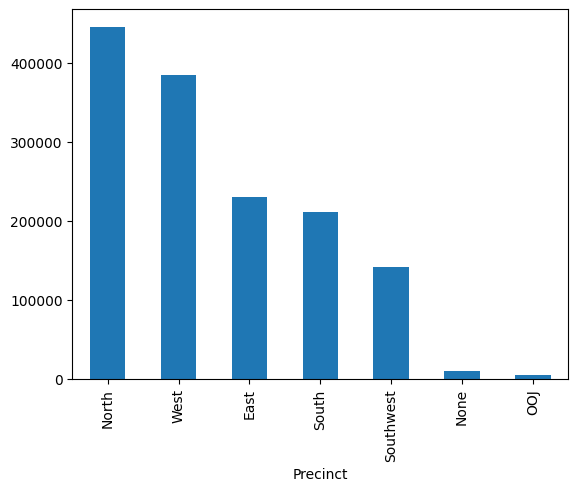

In [156]:
precint_nums = crime_data_2['Precinct'].value_counts()
precint_nums.plot(kind='bar')

In [157]:
crime_data_3 = crime_data_2[(crime_data_2['Precinct'] != 'None') & (crime_data_2['Precinct'] != 'OOJ')]

<Axes: xlabel='Precinct'>

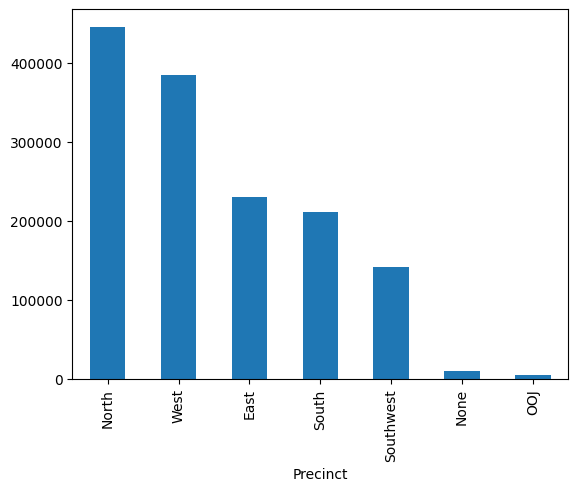

In [158]:
precint_nums = crime_data_2['Precinct'].value_counts()
precint_nums.plot(kind='bar')

<Axes: xlabel='Neighborhood'>

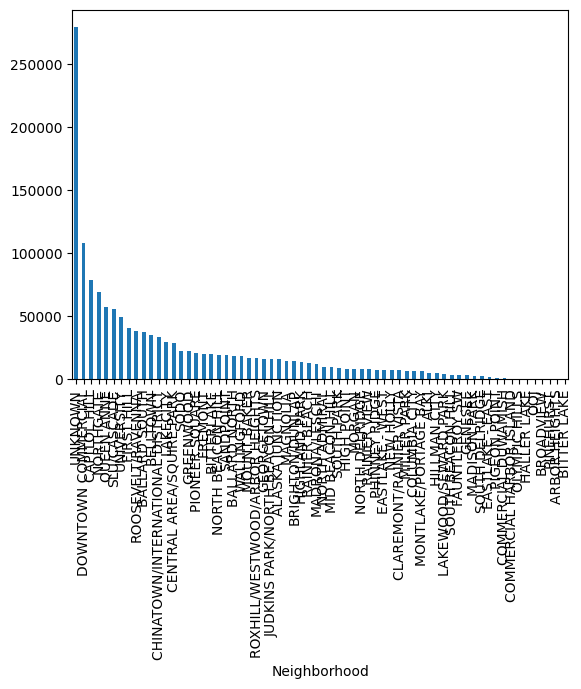

In [134]:
precint_nums = crime_data_2['Neighborhood'].value_counts()
precint_nums.plot(kind='bar')

In [159]:
crime_data_3['Neighborhood'].unique()

array(['ROOSEVELT/RAVENNA', 'LAKECITY', 'PHINNEY RIDGE', 'CAPITOL HILL',
       'NORTH BEACON HILL', 'BALLARD SOUTH', 'PIONEER SQUARE',
       'WALLINGFORD', 'SOUTH DELRIDGE', 'DOWNTOWN COMMERCIAL',
       'UNIVERSITY', 'HILLMAN CITY', 'CENTRAL AREA/SQUIRE PARK',
       'BITTERLAKE', 'BALLARD NORTH', 'SLU/CASCADE', 'MADRONA/LESCHI',
       'GENESEE', 'NORTHGATE', 'UNKNOWN', 'MAGNOLIA', 'MORGAN',
       'MOUNT BAKER', 'SODO', 'GREENWOOD', 'MILLER PARK', 'BELLTOWN',
       'NEW HOLLY', 'ROXHILL/WESTWOOD/ARBOR HEIGHTS',
       'CHINATOWN/INTERNATIONAL DISTRICT', 'FAUNTLEROY SW', 'FIRST HILL',
       'QUEEN ANNE', 'COLUMBIA CITY', 'FREMONT', 'BRIGHTON/DUNLAP',
       'PIGEON POINT', 'NORTH ADMIRAL', 'HIGHLAND PARK', 'SANDPOINT',
       'HIGH POINT', 'ALASKA JUNCTION', 'LAKEWOOD/SEWARD PARK',
       'SOUTH PARK', 'RAINIER BEACH', 'JUDKINS PARK/NORTH BEACON HILL',
       'GEORGETOWN', 'CLAREMONT/RAINIER VISTA', 'RAINIER VIEW',
       'EASTLAKE - WEST', 'EASTLAKE - EAST', 'NORTH DELRIDGE',
  

In [160]:
crime_data_3 = crime_data_3[crime_data_3['Neighborhood'] != 'OOJ']

# Using undersampling for a precinct model and a neighborhood model (both using laplace sampling)

## Precinct Model

Trying CategoricalNB with 'Offense_Hour', 'Offense_Month', 'Offense_Year' Time Columns and 'Precinct' Target Column

Separating predictors and labels

In [204]:
crime_data_X = crime_data_3[['Offense_Hour', 'Offense_Month', 'Offense_Year', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_3[['Precinct']]

Random Sampling

In [205]:
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(crime_data_X, crime_data_y)

Splitting training and test data

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [207]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Training

In [208]:
model = CategoricalNB()
model.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

Predicting

In [209]:
y_pred = model.predict(X_test_enc)

In [210]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.24452885934367416


In [211]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        East       0.25      0.16      0.19     28294
       North       0.23      0.46      0.31     28372
       South       0.25      0.22      0.23     28341
   Southwest       0.25      0.19      0.21     28634
        West       0.28      0.20      0.23     28514

    accuracy                           0.24    142155
   macro avg       0.25      0.24      0.24    142155
weighted avg       0.25      0.24      0.24    142155



## Neighborhood Example

Trying CategoricalNB with 'Offense_Hour', 'Offense_Month', 'Offense_Year' Time Columns and 'Precinct' Target Column

Separating predictors and labels

In [196]:
crime_data_X = crime_data_3[['Offense_Hour', 'Offense_Month', 'Offense_Year', 'NIBRS Crime Against Category', 'Offense Sub Category']]
crime_data_y = crime_data_3[['Neighborhood']]

Random Sampling

In [197]:
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(crime_data_X, crime_data_y)

Splitting training and test data

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

Using OrdinalEncoder as CategoricalNB only accepts the features to be integers

In [199]:
enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = -1)
X_train_enc = enc.fit_transform(X_train) + 1
X_test_enc = enc.transform(X_test) + 1

Training

In [200]:
model = CategoricalNB()
model.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

Predicting

In [201]:
y_pred = model.predict(X_test_enc)

In [202]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0


In [203]:
print(classification_report(y_test, y_pred))

                                  precision    recall  f1-score   support

                 ALASKA JUNCTION       0.00      0.00      0.00       0.0
                   BALLARD NORTH       0.00      0.00      0.00       1.0
                   BALLARD SOUTH       0.00      0.00      0.00       1.0
                        BELLTOWN       0.00      0.00      0.00       0.0
                      BITTERLAKE       0.00      0.00      0.00       1.0
                       BROADVIEW       0.00      0.00      0.00       0.0
        CENTRAL AREA/SQUIRE PARK       0.00      0.00      0.00       0.0
CHINATOWN/INTERNATIONAL DISTRICT       0.00      0.00      0.00       0.0
             COMMERCIAL DUWAMISH       0.00      0.00      0.00       1.0
                 EASTLAKE - WEST       0.00      0.00      0.00       1.0
                      FIRST HILL       0.00      0.00      0.00       0.0
                         GENESEE       0.00      0.00      0.00       0.0
                       GREENWOOD     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_